## 2.1 数据操作

### 2.1.1入门

In [14]:
import torch

In [15]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [16]:
# x.shape
x.size()

torch.Size([12])

In [17]:
x.numel()

12

In [18]:
X = x.reshape(3, 4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [19]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [20]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [21]:
torch.randn(3,4)

tensor([[-1.5048, -0.6776,  0.4755,  0.2938],
        [-0.5075,  0.2841,  0.4160, -0.1201],
        [ 1.1300, -0.9871,  1.2910,  0.8725]])

In [22]:
torch.tensor([[2,1,4,3],[1,2,3,4],[4,3,2,1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

### 2.1.2 运算符

In [23]:
x = torch.tensor([1.0,2,4,8])
y = torch.tensor([2,2,2,2])
x+y, x-y, x*y, x/y, x**y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [24]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [43]:
X = torch.arange(12, dtype=torch.float32).reshape(3,4)
Y = torch.tensor([[2.0,1,4,3],[1,2,3,4],[4,3,2,1]])
torch.cat((X,Y),dim=0), torch.cat((X,Y),dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [44]:
X > Y

tensor([[False, False, False, False],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]])

In [28]:
X.sum()

tensor(66.)

### 2.1.3 广播机制

In [29]:
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
a,b

(tensor([[0],
         [1],
         [2]]), tensor([[0, 1]]))

In [30]:
a+b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

### 2.1.4 索引和切片

In [31]:
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [32]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]), tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [33]:
X[1,2]=9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [34]:
X[0:2,:] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

### 2.1.5 节省内存

In [35]:
before = id(Y)
Y = Y + X
id(y) == before, id(Y)

(False, 139663649717424)

In [36]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 139663649657488
id(Z): 139663649657488


In [37]:
before = id(X)
X += Y
id(X) == before

True

### 2.1.6 转换为其他Python对象

In [39]:
A = X.numpy()
B = torch.tensor(A)
type(A), type(B), id(A), id(B) 

(numpy.ndarray, torch.Tensor, 139663649716144, 139663649717328)

In [41]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a), type(a)

(tensor([3.5000]), 3.5, 3.5, 3, torch.Tensor)

## 2.2 数据预处理

### 2.2.1读取数据集

In [47]:
import os
os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
  f.write('NumRooms,Alley,Price\n') # 列名
  f.write('NA,Pave,127500\n') # 每⾏表⽰⼀个数据样本
  f.write('2,NA,106000\n')
  f.write('4,NA,178100\n')
  f.write('NA,NA,140000\n')

In [49]:
import pandas as pd

data = pd.read_csv(data_file)
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


### 2.2.2处理缺失值

In [51]:
inputs, outputs = data.iloc[:,0:2], data.iloc[:,-1]
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [52]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


### 2.2.3转换成张量格式

In [54]:
import torch

X, y =torch.tensor(inputs.values), torch.tensor(outputs.values)
X,y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

## 2.3线性代数

### 2.3.1标量

In [55]:
import torch

x = torch.tensor(3.0)
y = torch.tensor(2.0)
x+y, x-y, x*y, x/y, x**y 

(tensor(5.), tensor(1.), tensor(6.), tensor(1.5000), tensor(9.))

### 2.3.2向量

In [6]:
x = torch.arange(4,dtype=torch.float32)
x

tensor([0., 1., 2., 3.])

In [57]:
x[3]

tensor(3)

In [58]:
len(x)

4

In [59]:
x.shape

torch.Size([4])

### 2.3.3矩阵

In [2]:
import torch

A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [2]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [4]:
B = torch.tensor([[1,2,3],[2,0,4],[3,4,5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [5]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

### 2.3.4张量

In [6]:
X = torch.arange(24).reshape(2,3,4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### 2.3.5张量算法的基本性质

In [7]:
A = torch.arange(20,dtype=torch.float32).reshape(5,4)
B = A.clone() #分配新的内存
A,B,A+B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]), tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]), tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [8]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [9]:
a = 2
X = torch.arange(24).reshape(2,3,4)
a+X,(a*X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]), torch.Size([2, 3, 4]))

### 2.3.6降维

In [12]:
x = torch.arange(4,dtype=torch.float32)
x,x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [13]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [14]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

In [15]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0

tensor([40., 45., 50., 55.])

In [17]:
#非降维求和
sum_A = A.sum(axis=1, keepdim=True)
sum_A,sum_A.shape

(tensor([[ 6.],
         [22.],
         [38.],
         [54.],
         [70.]]), torch.Size([5, 1]))

In [3]:
A, A.cumsum(axis=0)

(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15],
         [16, 17, 18, 19]]), tensor([[ 0,  1,  2,  3],
         [ 4,  6,  8, 10],
         [12, 15, 18, 21],
         [24, 28, 32, 36],
         [40, 45, 50, 55]]))

### 2.3.7点积

In [7]:
y = torch.ones(4,dtype=torch.float32)
x,y,torch.dot(x,y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

### 2.3.8 矩阵-向量积

In [19]:
A.shape, x.shape, torch.mv(A,x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

In [20]:
A = torch.arange(20,dtype=torch.float32).reshape(5,4)
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [16]:
x

tensor([0., 1., 2., 3.])

### 2.3.9矩阵与矩阵乘法

In [21]:
A = torch.arange(20).reshape(5,4)
B = torch.arange(12).reshape(4,3)
A,B

(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15],
         [16, 17, 18, 19]]), tensor([[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]]))

In [23]:
torch.mm(A,B)

tensor([[ 42,  48,  54],
        [114, 136, 158],
        [186, 224, 262],
        [258, 312, 366],
        [330, 400, 470]])

### 2.3.10 范数

In [24]:
u = torch.tensor([3.,4.])
torch.norm(u) # L2范数

tensor(5.)

In [25]:
torch.abs(u).sum() # L1范数

tensor(7.)

In [26]:
torch.norm(torch.ones(4,9)) #矩阵的Frobenius范数，类似于向量的L2范数

tensor(6.)

## 2.4微积分

### *2.4.1导数和微分*


In [2]:
%matplotlib inline
import numpy as np
from IPython import display
from d2l import torch as d2l

def f(x):
  return 3 * x ** 2 - 4 * x

In [3]:
def nmumerical_lim(f,x,h):
  return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
  print(f'h={h:.5f}, numerical limit={nmumerical_lim(f, 1, h): .5f}')
  h *= 0.1

h=0.10000, numerical limit= 2.30000
h=0.01000, numerical limit= 2.03000
h=0.00100, numerical limit= 2.00300
h=0.00010, numerical limit= 2.00030
h=0.00001, numerical limit= 2.00003


In [4]:
def use_svg_display():
  """使用svg格式在Jupyter中显示绘图"""
  display.set_matplotlib_formats('svg')

In [5]:
def set_figsize(figsize=(3.5, 2.5)):
  """设置matplotlib的图表⼤⼩"""
  use_svg_display()
  d2l.plt.rcParams['figure.figsize'] = figsize

In [6]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
  """设置matplotlib的轴"""
  axes.set_xlabel(xlabel)
  axes.set_ylabel(ylabel)
  axes.set_xscale(xscale)
  axes.set_yscale(yscale)
  axes.set_xlim(xlim)
  axes.set_ylim(ylim)
  if legend:
    axes.legend(legend)
    axes.grid()

In [7]:
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
     ylim=None, xscale='linear', yscale='linear',
     fmts=('-', 'm--', 'g-', 'r:'), figsize=(3.5,2.5), axes=None):
  """绘制数据点"""
  if legend is None:
    legend = []
  
  set_figsize(figsize)
  axes = axes if axes else d2l.plt.gca()

  def has_one_axis(X):
    return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list) and not hasattr(X[0], "__len__"))

  if has_one_axis(X):
    X=[X]
  if Y is None:
    X, Y = [[]] * len(X), X
  elif has_one_axis(Y):
    Y = [Y]
  if len(X) != len(Y):
    X = X * len(Y)
  axes.cla()
  for x, y, fmt in zip(X, Y, fmts):
    if len(X):
      axes.plot(x, y, fmt)
    else:
      axes.plot(y, fmt)
  set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

C:\Users\ly\AppData\Local\Temp\ipykernel_14528\759461320.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


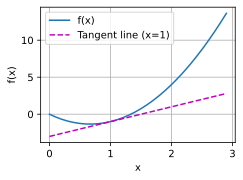

In [8]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## 2.5自动微分

### 2.5.1一个简单的例子

In [9]:
import torch
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [10]:
x.requires_grad_(True) # 等价于x=torch.arange(4.0,requires_grad=True)
x.grad # 默认值是None

In [11]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [12]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [13]:
x.grad == 4 * x

tensor([True, True, True, True])

In [14]:
# 在默认情况下， PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### 2.5.2非标量变量的反向传播

In [15]:
# 对⾮标量调⽤backward需要传⼊⼀个gradient参数，该参数指定微分函数关于self的梯度。
# 在我们的例⼦中，我们只想求偏导数的和，所以传递⼀个1的梯度是合适的
x.grad.zero_()
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

### 2.5.3 *分离计算*

    有时，我们希望将某些计算移动到记录的计算图之外。例如，假设y是作为x的函数计算的，而z则是作为y和x的函数计算的。想象⼀下，我们想计算z关于x的梯度，但由于某种原因，我们希望将y视为⼀个常数，并且只考虑到x在y被计算后发挥的作⽤。

    在这⾥，我们可以分离y来返回⼀个新变量u，该变量与y具有相同的值，但丢弃计算图中如何计算y的任何信息。换句话说，梯度不会向后流经u到x。因此，下⾯的反向传播函数计算z=u*x关于x的偏导数，同时将u作为常数处理，而不是z=x*x*x关于x的偏导数。

In [16]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x
z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [17]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

### 2.5.4Python控制流的梯度计算

In [18]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [19]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [20]:
a.grad == d / a

tensor(True)

## 2.6概率

### 2.6.1基本概率论

In [21]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [22]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 0., 1., 0.])

In [23]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([1., 1., 1., 4., 3., 0.])

In [24]:
# 将结果存储为32位浮点数以进⾏除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000 # 相对频率作为估计值

tensor([0.1490, 0.1800, 0.1810, 0.1570, 0.1610, 0.1720])

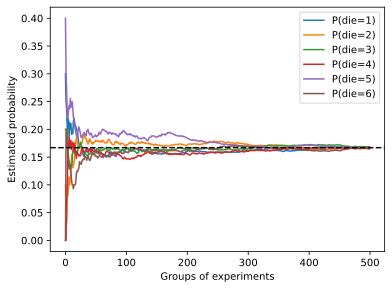

In [25]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();